## Time series change point detection using banpei
https://github.com/tsurubee/banpei

In [53]:
import banpei
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

### Read files

In [3]:
data = pd.read_csv('./csv/2017-01-03/book_events_total_view_2017-01-03.csv')

### Data exploration

In [6]:
data.head()

,Unnamed: 0,timestamp,order_id,book_event_type,price,quantity,aux_quantity,side,aux1,aux2,sector,ticker
0,277,1483453800048957906,0,T,45930000000,100,0,U,35,0,Health Care,A
1,569,1483453923291060179,0,T,45960000000,65,0,U,35,0,Health Care,A
2,570,1483453923291060179,14151601,T,45950000000,100,0,B,35,0,Health Care,A
3,571,1483453923291060179,14151605,T,45950000000,135,65,B,35,0,Health Care,A
4,599,1483453981377368442,14151605,T,45950000000,65,0,B,35,0,Health Care,A


In [26]:
data = data.drop(columns='Unnamed: 0')

In [36]:
data = data.sort_values(by='timestamp', axis=0)

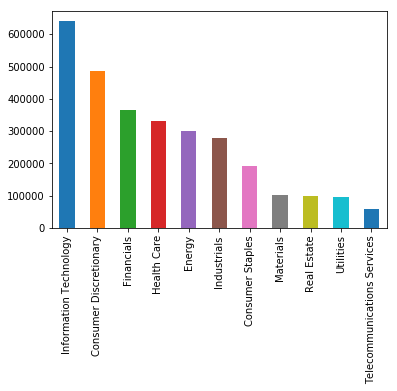

In [37]:
data.sector.value_counts().plot(kind='bar')
plt.show()

### Based on above representation choosing two different sectors: IT and Financials

In [38]:
infotech = data[data.sector=='Information Technology']

In [39]:
infotech.shape

(641353, 11)

In [40]:
finance = data[data.sector=='Financials']

In [41]:
finance.shape

(364246, 11)

In [43]:
infotech.head()

,timestamp,order_id,book_event_type,price,quantity,aux_quantity,side,aux1,aux2,sector,ticker
18660,1483434214797190628,257357,T,116020000000,41,59,B,35,0,Information Technology,AAPL
18661,1483434214797455124,257357,T,116020000000,25,34,B,35,0,Information Technology,AAPL
18662,1483434234152860708,257493,T,116020000000,100,0,B,35,0,Information Technology,AAPL
18663,1483434234169803932,258653,T,116020000000,100,0,B,35,0,Information Technology,AAPL
18664,1483434234169803932,0,T,116020000000,34,0,U,35,0,Information Technology,AAPL


### Doing change point detection using banpei for finance data

In [45]:
model   = banpei.SST(w=50)

In [47]:
fin_price = np.array(finance.price)

In [49]:
fin_price

array([22460000000, 22410000000, 22410000000, ..., 22570000000,
       22580000000, 87250000000], dtype=int64)

In [54]:
start_time = time.time()
results = model.detect(fin_price, is_lanczos=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 161.80820202827454 seconds ---


In [86]:
# set figure size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 6.0]


No handles with labels found to put in legend.


Text(0,1,'SST Change Point')

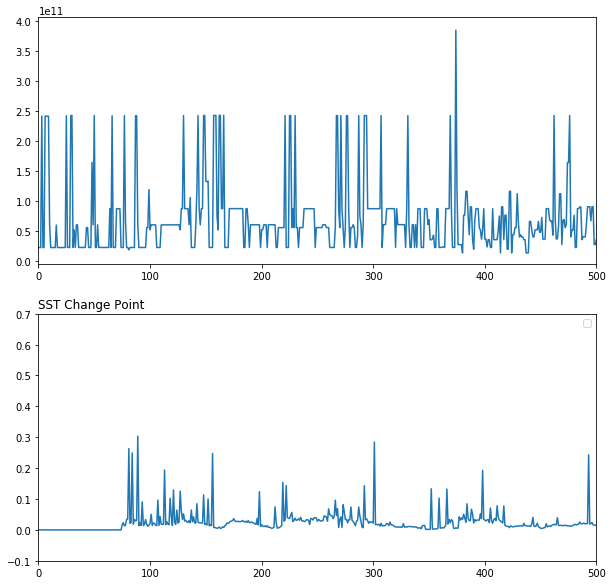

In [91]:
plt.subplot(211)
plt.plot(fin_price)
plt.xlim(0, 500)


plt.subplot(212)
plt.plot(results)
plt.xlim(0, 500)
plt.ylim(-0.1, 0.7)
plt.legend()
plt.title('SST Change Point', loc='left')